## Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import mpld3 as mpl
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
len(df)

569

In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Visualization

### Visualizing null values

<AxesSubplot:>

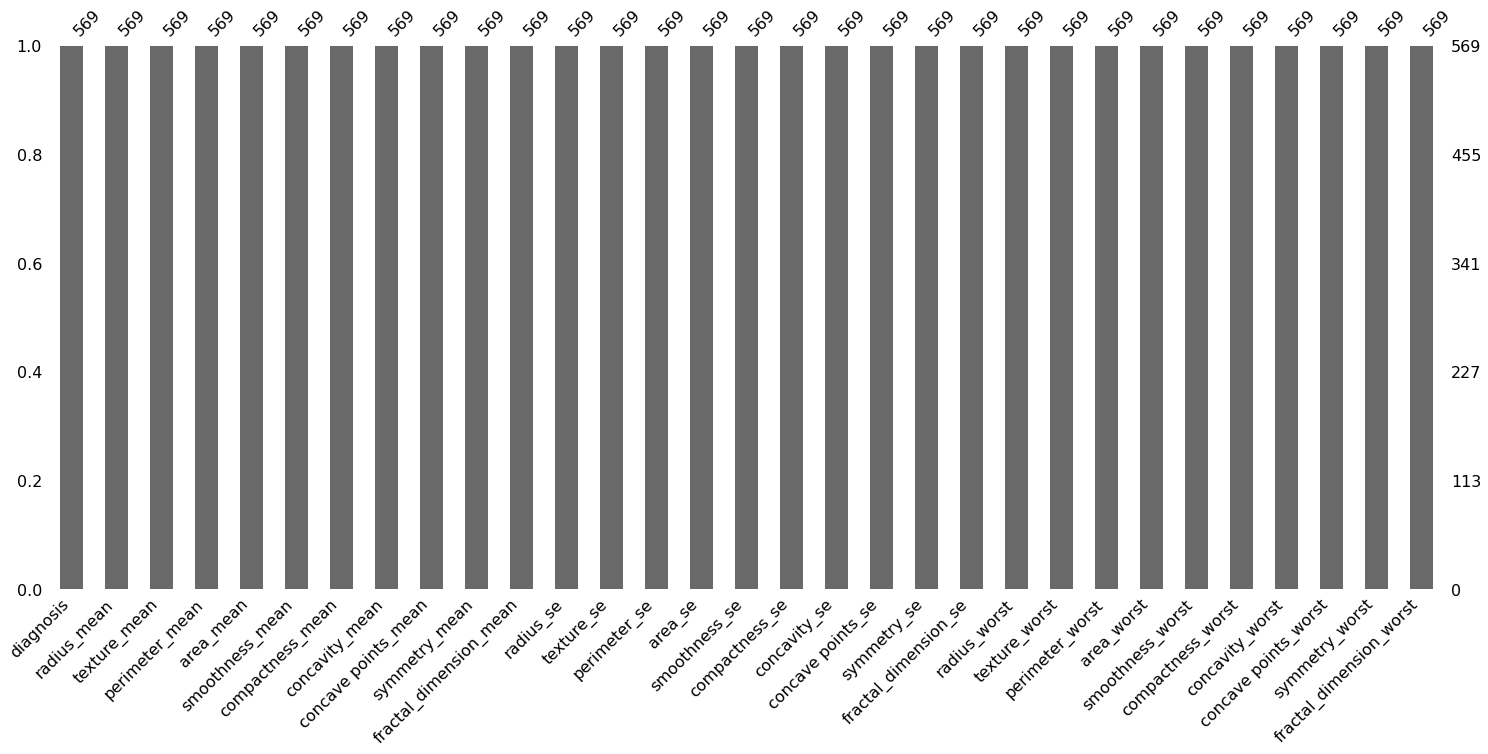

In [10]:
msno.bar(df)

### Density

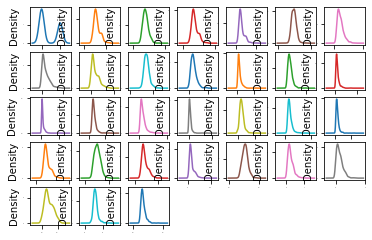

In [11]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

### Correlation matrix

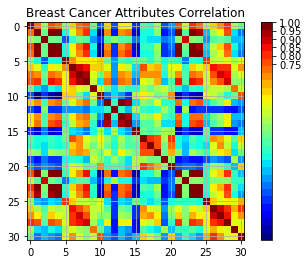

In [12]:
from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()


### Histogram

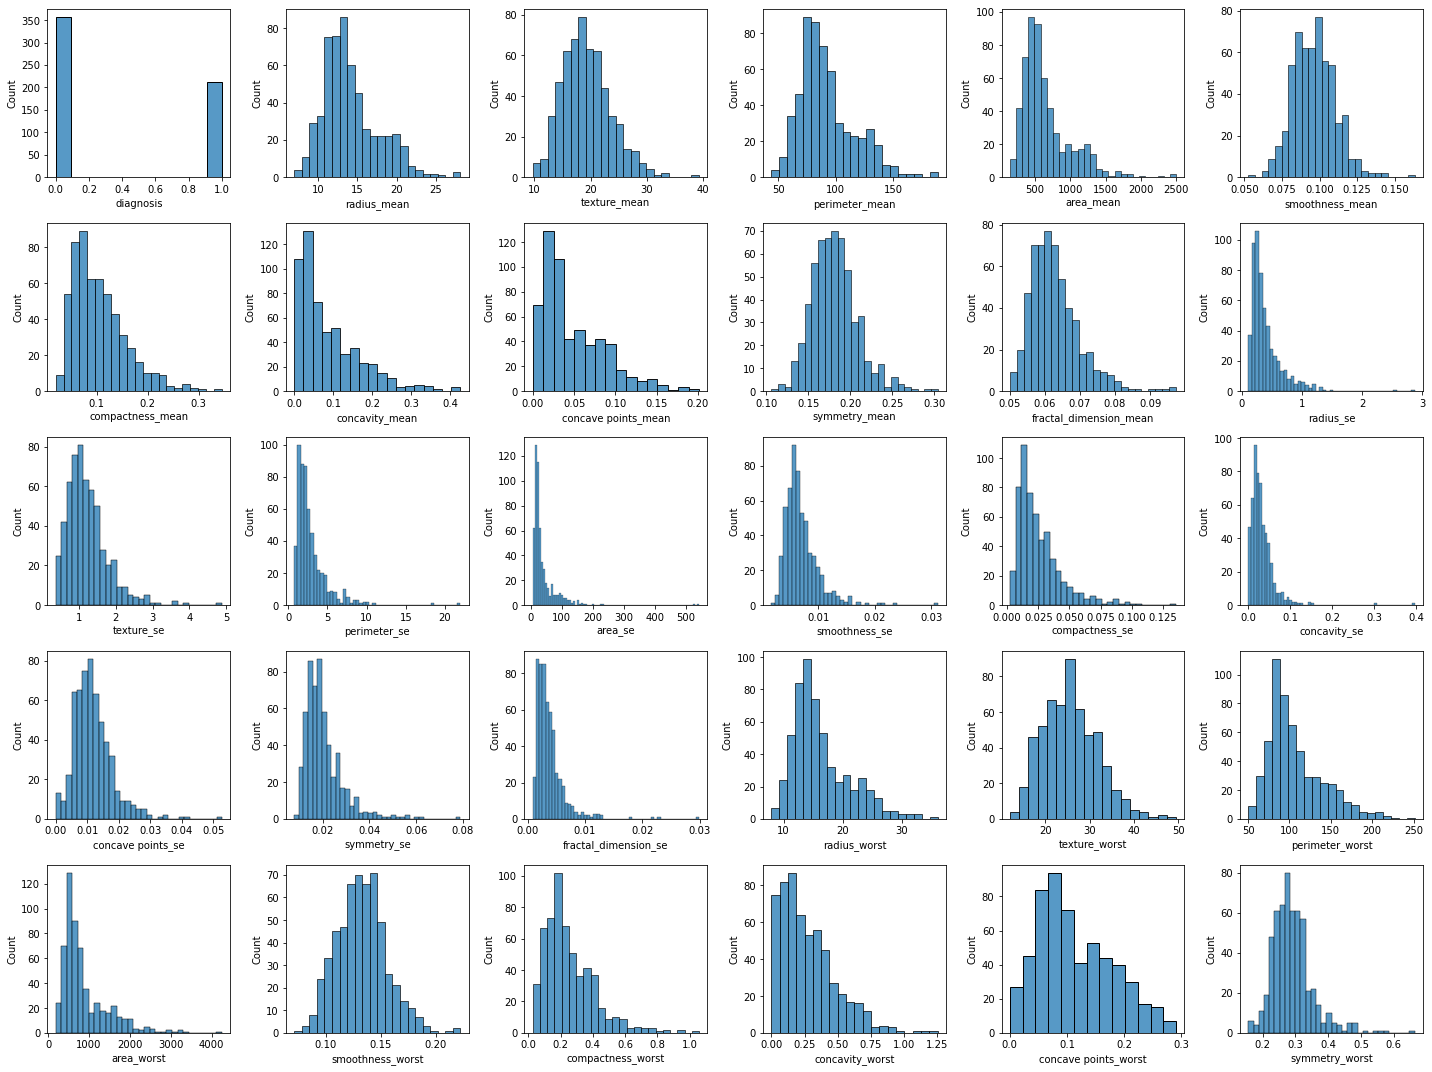

In [13]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Scatterplot

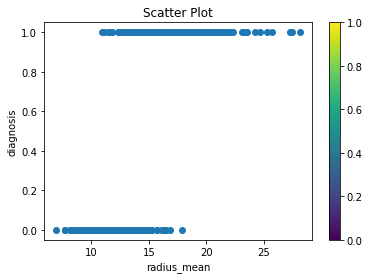

In [14]:
plt.scatter(df["radius_mean"],df["diagnosis"])
plt.title("Scatter Plot")
plt.xlabel("radius_mean")
plt.ylabel("diagnosis")
plt.colorbar()
plt.show()

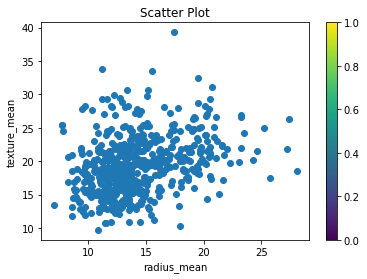

In [15]:
plt.scatter(df["radius_mean"],df["texture_mean"])
plt.title("Scatter Plot")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.colorbar()
plt.show()

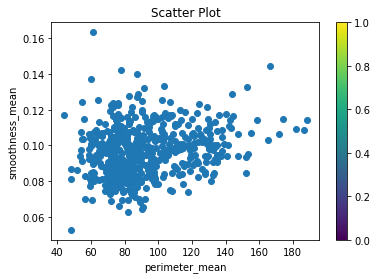

In [16]:
plt.scatter(df["perimeter_mean"],df["smoothness_mean"])
plt.title("Scatter Plot")
plt.xlabel("perimeter_mean")
plt.ylabel("smoothness_mean")
plt.colorbar()
plt.show()

### Boxplot

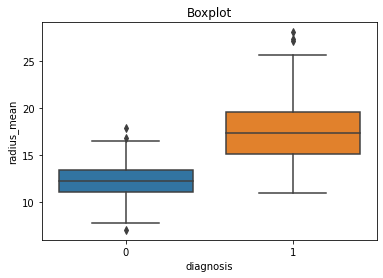

In [17]:
sns.boxplot( x="diagnosis", y='radius_mean', data=df, )
plt.title("Boxplot")
plt.show()

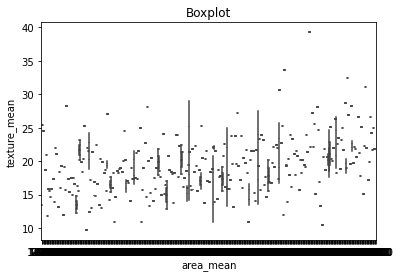

In [18]:
sns.boxplot( x="area_mean", y='texture_mean', data=df )
plt.title("Boxplot")
plt.show()

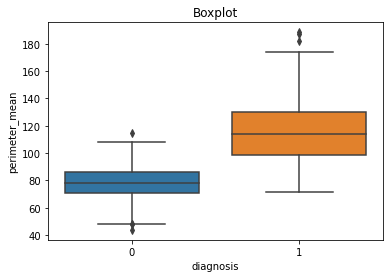

In [19]:
sns.boxplot( x="diagnosis", y='perimeter_mean', data=df )
plt.title("Boxplot")
plt.show()

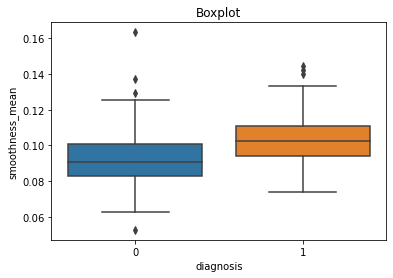

In [20]:
sns.boxplot( x="diagnosis", y='smoothness_mean', data=df )
plt.title("Boxplot")
plt.show()

### Linechart

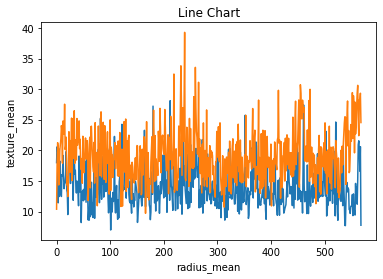

In [21]:
plt.title("Line Chart")
plt.plot(df['radius_mean'])
plt.plot(df['texture_mean'])
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

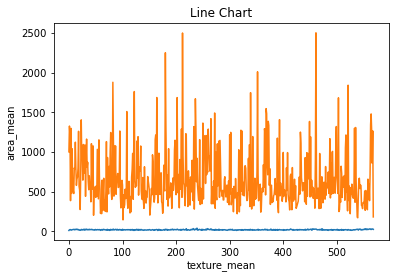

In [22]:
plt.title("Line Chart")
plt.plot(df['texture_mean'])
plt.plot(df['area_mean'])
plt.xlabel("texture_mean")
plt.ylabel("area_mean")
plt.show()

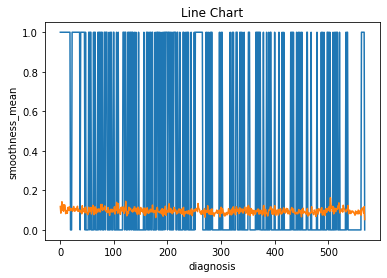

In [23]:
plt.title("Line Chart")
plt.plot(df['diagnosis'])
plt.plot(df['smoothness_mean'])
plt.xlabel("diagnosis")
plt.ylabel("smoothness_mean")
plt.show()

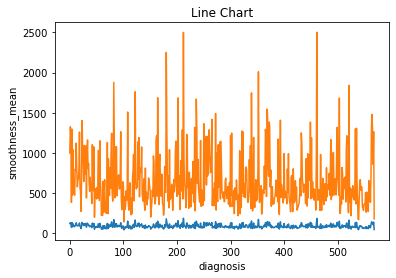

In [24]:
plt.title("Line Chart")
plt.plot(df['perimeter_mean'])
plt.plot(df['area_mean'])
plt.xlabel("diagnosis")
plt.ylabel("smoothness_mean")
plt.show()

### Barchart

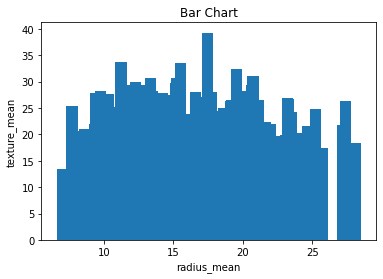

In [25]:
plt.bar(df["radius_mean"],df["texture_mean"])
plt.title("Bar Chart")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

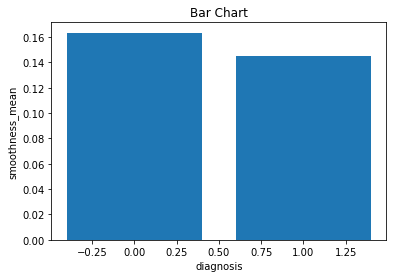

In [26]:
plt.bar(df["diagnosis"],df["smoothness_mean"])
plt.title("Bar Chart")
plt.xlabel("diagnosis")
plt.ylabel("smoothness_mean")
plt.show()

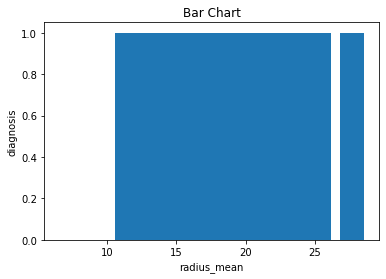

In [27]:
plt.bar(df["radius_mean"],df["diagnosis"])
plt.title("Bar Chart")
plt.xlabel("radius_mean")
plt.ylabel("diagnosis")
plt.show()

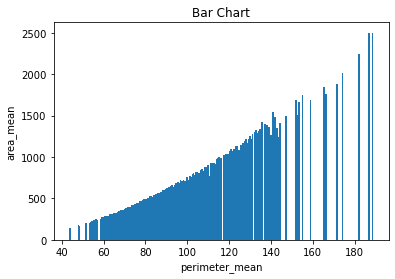

In [28]:
plt.bar(df["perimeter_mean"],df["area_mean"])
plt.title("Bar Chart")
plt.xlabel("perimeter_mean")
plt.ylabel("area_mean")
plt.show()

### Nuclear features vs Diagnosis 

In [29]:
features_mean=list(df.columns[1:11])
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

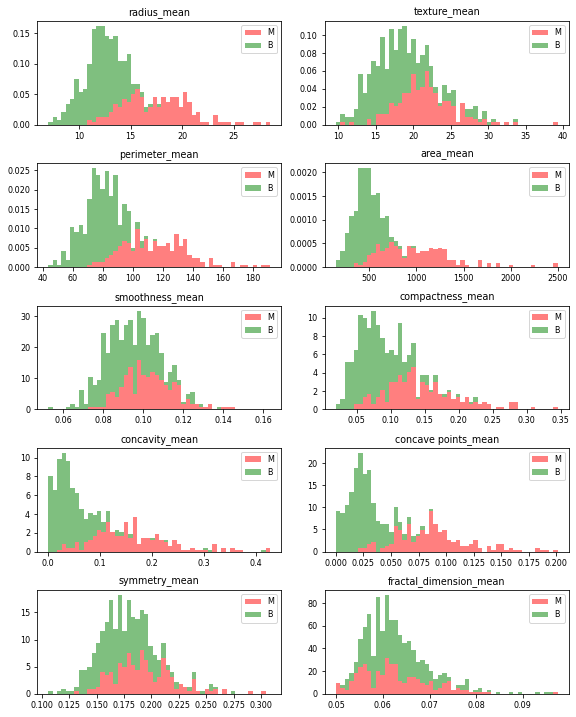

In [30]:


plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], 
            bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth),
            alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()



## Creating a test set and a training set

In [31]:
traindf, testdf = train_test_split(df, test_size = 0.3)

## Model Classification

In [32]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])

    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    kf = KFold(n_splits=5)
    error = []
    
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        
        model.fit(train_predictors, train_target)
        
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    model.fit(data[predictors], data[outcome])



### Logistic Regression model

In [33]:
predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var = 'diagnosis'
model = LogisticRegression()
classification_model(model, traindf, predictor_var, outcome_var)


Accuracy : 90.201%
Cross-Validation Score : 90.196%


In [34]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.196%
Cross-Validation Score : 89.440%


### Decision tree model

In [35]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.196%


In [36]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.206%


### Random Forest

In [37]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 96.482%
Cross-Validation Score : 94.225%


In [38]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concavity_mean            0.213127
concave points_mean       0.207605
perimeter_mean            0.200322
area_mean                 0.164792
radius_mean               0.094029
texture_mean              0.048770
compactness_mean          0.038475
smoothness_mean           0.018571
symmetry_mean             0.009323
fractal_dimension_mean    0.004985
dtype: float64


In [39]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concavity_mean            0.213127
concave points_mean       0.207605
perimeter_mean            0.200322
area_mean                 0.164792
radius_mean               0.094029
texture_mean              0.048770
compactness_mean          0.038475
smoothness_mean           0.018571
symmetry_mean             0.009323
fractal_dimension_mean    0.004985
dtype: float64


In [40]:
predictor_var =  ['radius_mean']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 96.985%
Cross-Validation Score : 81.908%


### Using on the test data set

In [41]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 95.322%
Cross-Validation Score : 90.017%


# **Conclusion**

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.